### 1. Activation Functions

Activation functions decide **how neurons respond** to input.

- Without activation → network is just linear math
- With activation → network learns complex patterns

Common activations used in GANs:
- ReLU
- LeakyReLU
- Sigmoid
- Tanh
| Activation Function | Mathematical Formula                                                | Output Range | Small Curve (Indicative Shape) |
| ------------------- | ------------------------------------------------------------------- | ------------ | ------------------------------ |
| **Sigmoid**         | ( \sigma(x) = \frac{1}{1 + e^{-x}} )                                | (0, 1)       | ▁▂▃▄▅▆▇█                       |
| **Tanh**            | ( \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} )                    | (-1, 1)      | ▁▂▄▆█▆▄▂                       |
| **ReLU**            | ( f(x) = \max(0, x) )                                               | [0, ∞)       | ▁▁▁▁▂▄▆█                       |
| **Leaky ReLU**      | ( f(x) = \max(\alpha x, x),; \alpha \approx 0.01 )                  | (-∞, ∞)      | ▁▂▃▁▂▄▆█                       |
| **ELU**             | ( f(x)= \begin{cases} x & x>0 \ \alpha(e^x-1) & x\le0 \end{cases} ) | (-α, ∞)      | ▁▂▃▄▅▆▇█                       |
| **Softplus**        | ( f(x)=\ln(1+e^x) )                                                 | (0, ∞)       | ▁▂▃▄▅▆▇█                       |
| **Softmax**         | ( \text{softmax}(z_i)=\frac{e^{z_i}}{\sum_j e^{z_j}} )              | (0,1), sum=1 | ▂▄▆█▆▄▂                        |


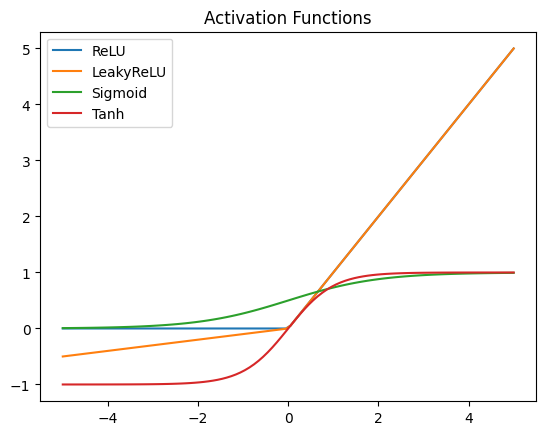

In [1]:
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-5, 5, 100)

relu = torch.relu(x)
leaky_relu = torch.nn.functional.leaky_relu(x, 0.1)
sigmoid = torch.sigmoid(x)
tanh = torch.tanh(x)

plt.figure()
plt.plot(x, relu, label='ReLU')
plt.plot(x, leaky_relu, label='LeakyReLU')
plt.plot(x, sigmoid, label='Sigmoid')
plt.plot(x, tanh, label='Tanh')
plt.legend()
plt.title('Activation Functions')
plt.show()

### Key Takeaway
- Generator mostly uses **ReLU / Tanh**
- Discriminator mostly uses **LeakyReLU / Sigmoid**

### 2. Feedforward Neural Network → GAN Discriminator Mapping

A **Discriminator** is simply a **binary classification neural network**.

| Component | Feedforward NN | GAN Discriminator |
|---------|---------------|------------------|
| Input | Features | Image / Data sample |
| Hidden Layers | Dense layers | Dense / CNN layers |
| Output | Numeric value | Probability (Real / Fake) |
| Activation | ReLU | LeakyReLU |
| Final Layer | Linear | Sigmoid |

In [2]:
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

D = Discriminator()
print(D)

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=1, out_features=16, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=16, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


### 3. Day-2 GAN Starter (Minimal Working GAN)

Goal: Learn a simple numeric distribution around value **5**.

This example shows **Generator + Discriminator interaction** with minimal complexity.

In [3]:
import torch.optim as optim 

# Real data
real_data = torch.randn(100, 1) + 5

# Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1, 1)

    def forward(self, z):
        return self.fc(z)

G = Generator()
D = Discriminator()

criterion = nn.BCELoss()
opt_G = optim.Adam(G.parameters(), lr=0.01) # 0.1 to 0.00001
opt_D = optim.Adam(D.parameters(), lr=0.01)

In [5]:
opt_D

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [4]:
opt_G 

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [6]:
for epoch in range(300):
    # Train Discriminator
    z = torch.randn(100, 1)
    fake_data = G(z)

    real_labels = torch.ones(100, 1)
    fake_labels = torch.zeros(100, 1)

    d_loss = criterion(D(real_data), real_labels) + \
             criterion(D(fake_data.detach()), fake_labels)

    opt_D.zero_grad()
    d_loss.backward()
    opt_D.step()

    # Train Generator
    g_loss = criterion(D(fake_data), real_labels)
    opt_G.zero_grad()
    g_loss.backward()
    opt_G.step()

print('Training completed')

Training completed
